In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,5)

In [45]:
train = pd.read_csv('../inputs/train.csv', index_col='id')
test = pd.read_csv('../inputs/test.csv', index_col='id')

In [46]:
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [47]:
test.head()

,comment_text
id,
00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
0000247867823ef7,== From RfC == \n\n The title is fine as it is...
00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
00017563c3f7919a,":If you have a look back at the source, the in..."
00017695ad8997eb,I don't anonymously edit articles at all.


In [48]:
print('Train dataset have {} rows and {} columns\nTest dataset have {} rows and {} columns'.
      format(*train.shape, *test.shape))

Train dataset have 159571 rows and 7 columns
Test dataset have 153164 rows and 1 columns


In [49]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
train.columns

Index(['comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [51]:
labels = train.drop('comment_text', axis=1)

In [52]:
labels_pcts = labels.mean().sort_values(ascending=False)
print(labels_pcts)

toxic            0.095844
obscene          0.052948
insult           0.049364
severe_toxic     0.009996
identity_hate    0.008805
threat           0.002996
dtype: float64


In [53]:
sns.set(style='whitegrid')

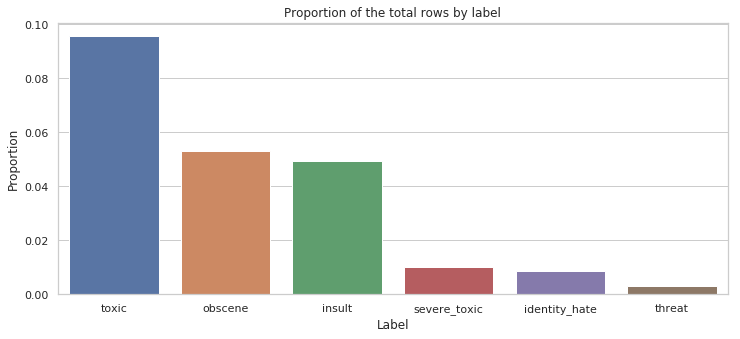

In [54]:
sns.barplot(x=labels_pcts.index, y=labels_pcts)
plt.ylabel('Proportion')
plt.xlabel('Label')
plt.title('Proportion of the total rows by label')
plt.savefig('../dataviz/01_01_label_proportion')

In [59]:
text_len = train.comment_text.str.len().values.tolist() + test.comment_text.str.len().values.tolist()

/home/andre/anaconda3/envs/capstone/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


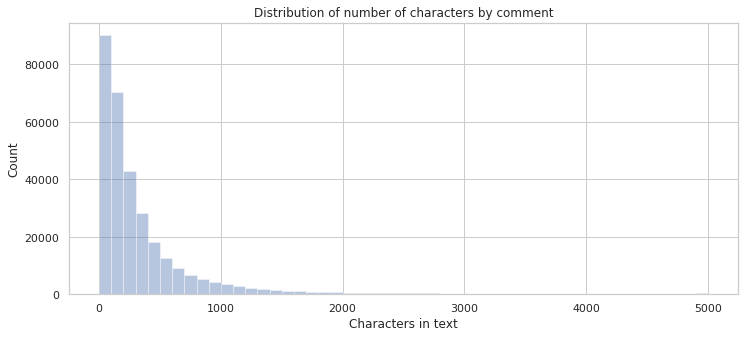

In [65]:
sns.distplot(text_len, kde=False)
plt.ylabel('Count')
plt.xlabel('Characters in text')
plt.title('Distribution of number of characters by comment')
plt.savefig('../dataviz/01_02_characters_distribution')

In [62]:
pd.DataFrame(text_len).describe()

,0
count,312735.000000
mean,379.773262
std,591.767791
min,1.000000
25%,87.000000
50%,193.000000
75%,414.000000
max,5000.000000
